In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("C:/Users/admin/Downloads/Healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [5]:
print(df.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
df.duplicated().sum()  # Count duplicate rows


0

In [9]:
print(df.dtypes)

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


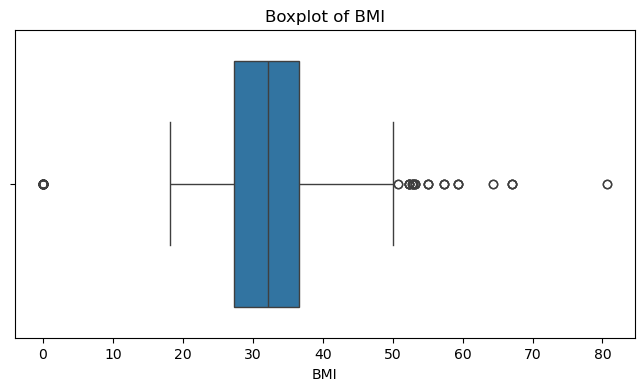

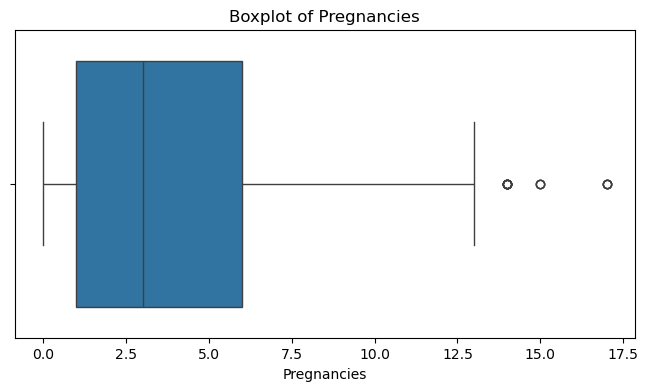

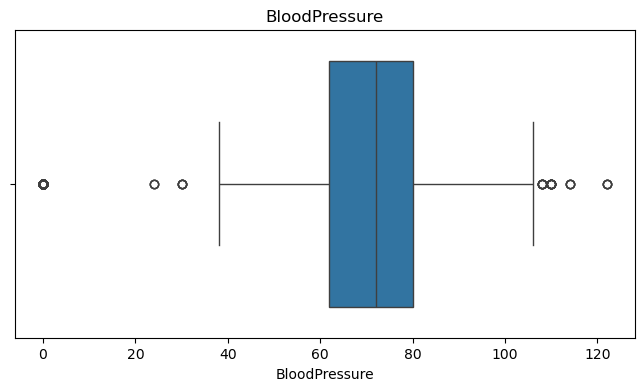

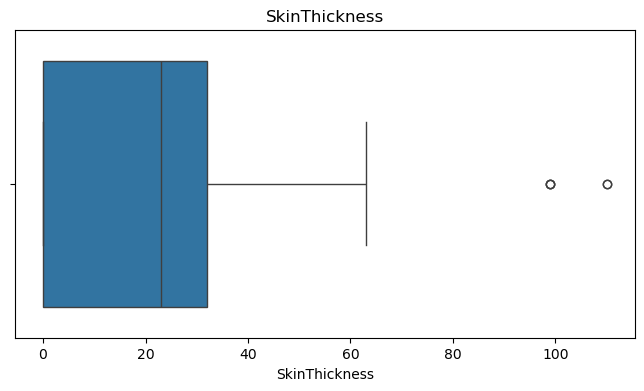

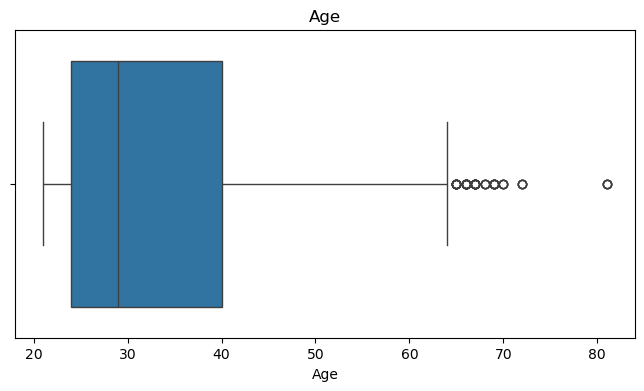

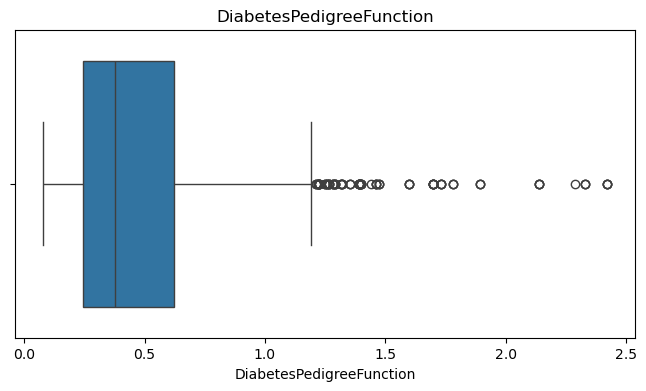

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['BMI'])
plt.title("Boxplot of BMI")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Pregnancies'])
plt.title("Boxplot of Pregnancies")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['BloodPressure'])
plt.title("BloodPressure")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['SkinThickness'])
plt.title("SkinThickness")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title("Age")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.title("DiabetesPedigreeFunction")
plt.show()

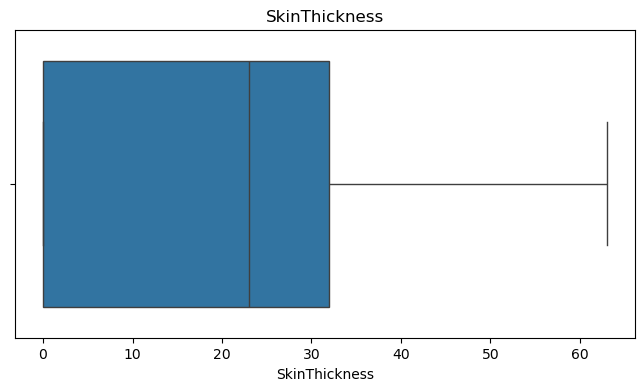

In [13]:
# Calculate the IQR for the 'SkinThickness' column
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers from the 'SkinThickness' column
df = df[(df['SkinThickness'] >= lower_bound) & (df['SkinThickness'] <= upper_bound)]

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['SkinThickness'])
plt.title("SkinThickness")
plt.show()

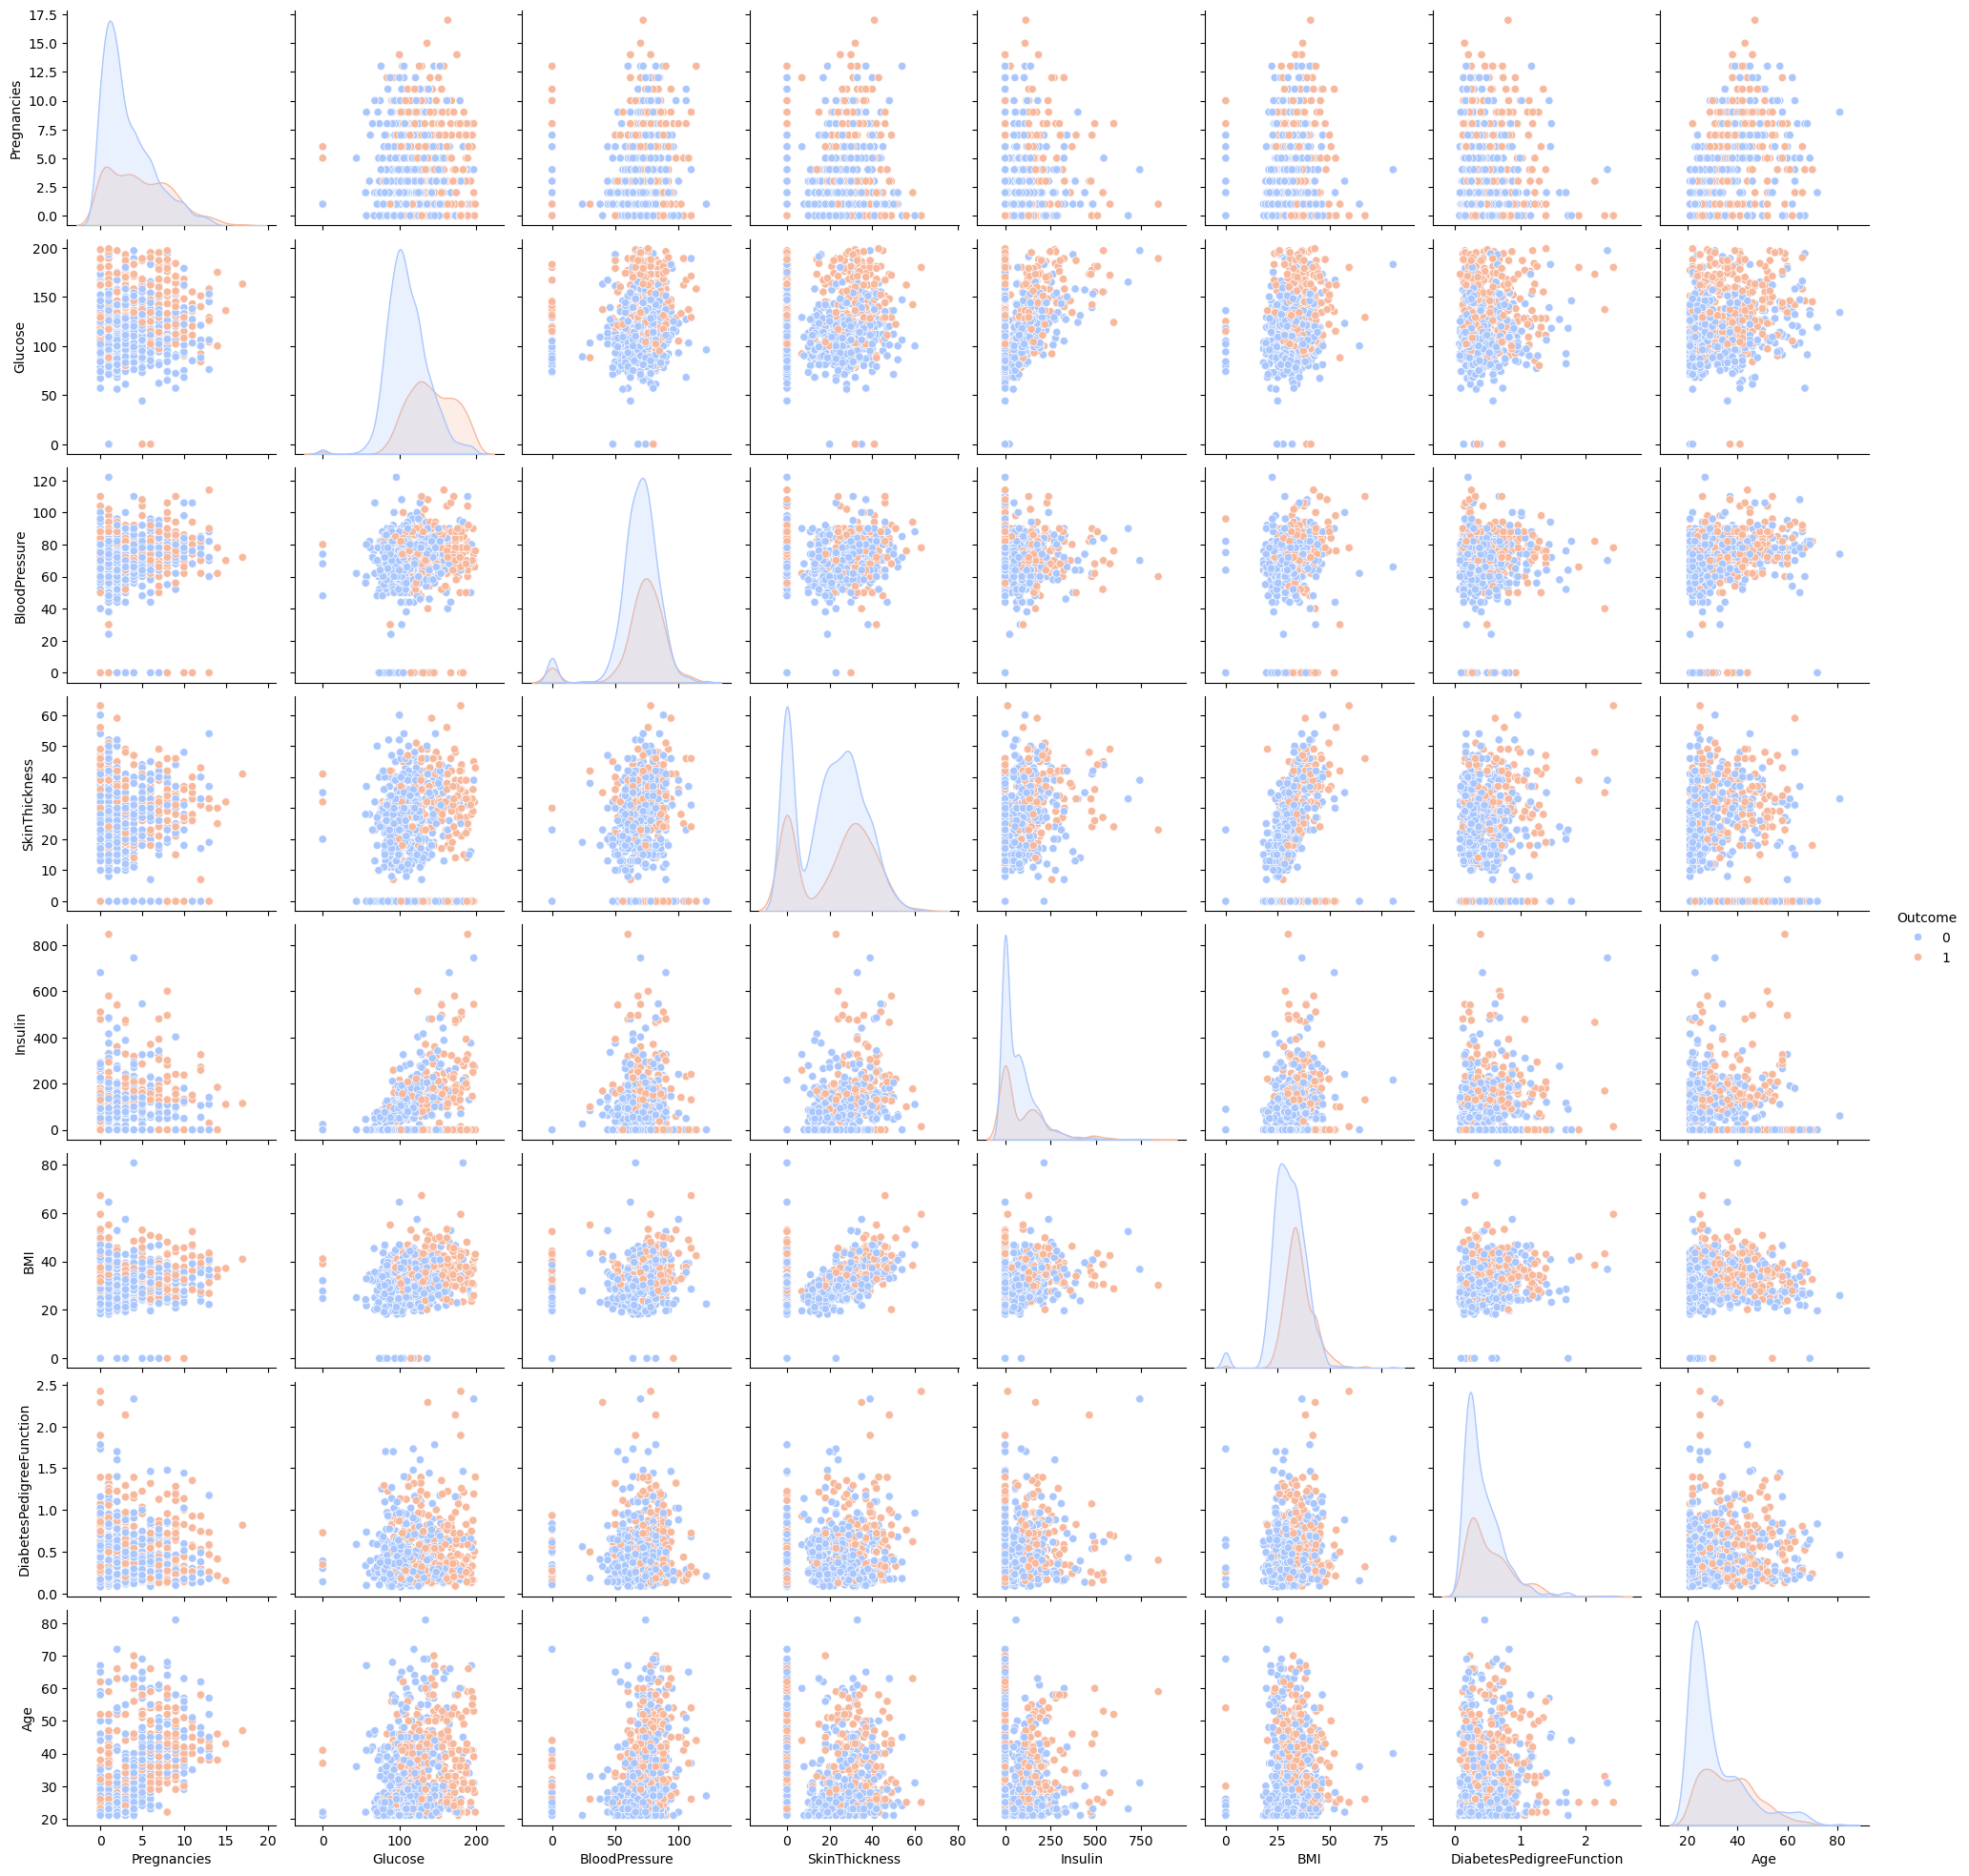

In [23]:
columns_to_plot = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
sns.pairplot(df[columns_to_plot + ['Outcome']], hue='Outcome', palette='coolwarm')
plt.show()

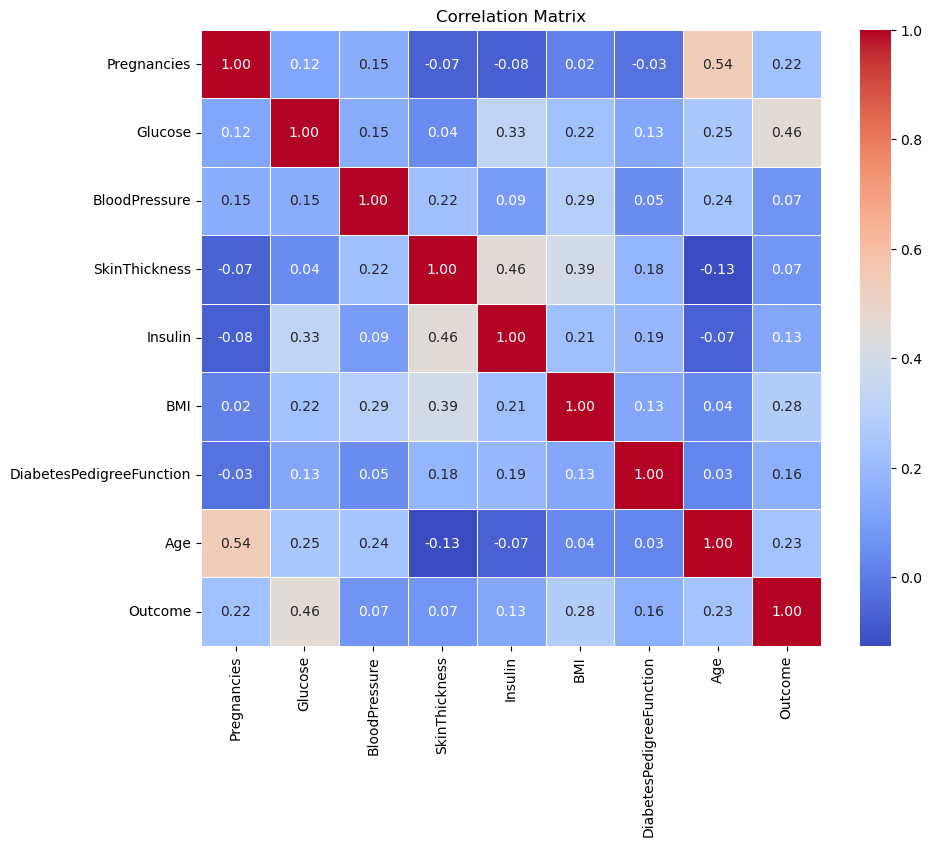

In [25]:
# Compute the correlation matrix
corr_matrix = df[columns_to_plot + ['Outcome']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["Outcome"])  # Drop target column
y = df["Outcome"]  # Target column (1 = Diabetic, 0 = Non-Diabetic)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing data
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2210, 9) (2210,)
Testing set shape: (553, 9) (553,)


In [31]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7034358047016275
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       365
           1       0.60      0.38      0.47       188

    accuracy                           0.70       553
   macro avg       0.67      0.63      0.63       553
weighted avg       0.69      0.70      0.68       553



D:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model has less accuracy - Lets do feature scaling and handle class imbalance

In [39]:
# Define features (X) and target (y)
X = df.drop(columns=["Outcome"])  # Drop target column
y = df["Outcome"]  # Target column (1 = Diabetic, 0 = Non-Diabetic)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing data
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2210, 9) (2210,)
Testing set shape: (553, 9) (553,)


In [41]:
print(y_train.value_counts())  # Check class distribution

Outcome
0    1449
1     761
Name: count, dtype: int64


In [43]:
# Define pipeline with scaling and class weighting
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('model', LogisticRegression(class_weight='balanced'))  # Step 2: Train Model with Class Weighting
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7341772151898734
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       365
           1       0.59      0.71      0.64       188

    accuracy                           0.73       553
   macro avg       0.71      0.73      0.72       553
weighted avg       0.75      0.73      0.74       553

